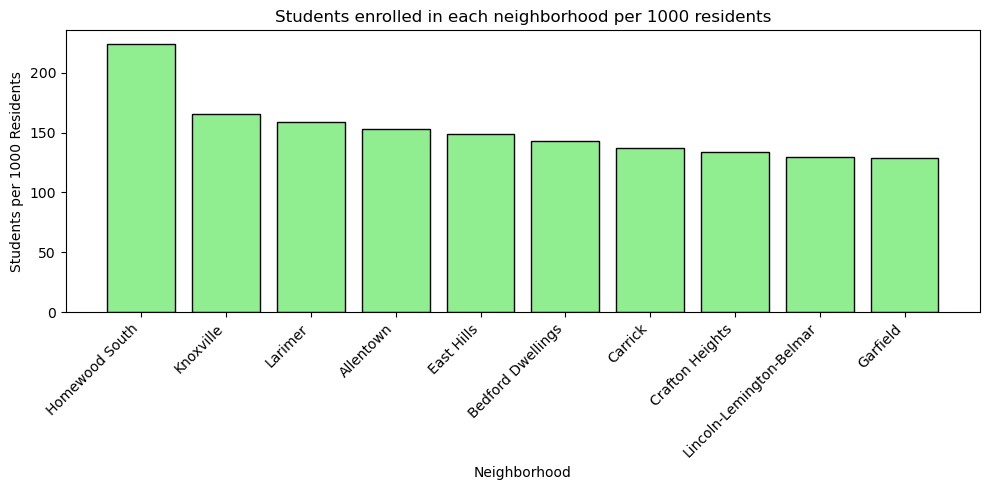

In [23]:
###### import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd

#loading datasets
enrollment = pd.read_csv("neighborhood_enrollment.csv")
population = pd.read_csv("neighborhood population.csv")

#enrollment dataset
enrollment = enrollment[["neighborhood", "total_students_enrolled"]].copy()
enrollment["total_students_enrolled"] = pd.to_numeric(enrollment["total_students_enrolled"], errors="coerce")
enrollment = enrollment.dropna(subset=["total_students_enrolled"])
neighborhood_totals = (enrollment.groupby("neighborhood")["total_students_enrolled"].sum().reset_index())

#population dataset
population = population[["AreaName", "Var_2023_TotalPopulation"]].copy()
population.columns = ["neighborhood", "population"]

#merge both datasets
merged = pd.merge(neighborhood_totals, population, on="neighborhood", how="inner")

merged["students_per_1000_residents"] = merged["total_students_enrolled"] / merged["population"] * 1000

#sort the new dataset from highest to lowest
merged_sorted = merged.sort_values("students_per_1000_residents",ascending=False)

#extracting the top 10
top10 = merged_sorted.head(10)

#creating the bar chart 
plt.figure(figsize=(10, 5))
plt.bar(top10["neighborhood"], top10["students_per_1000_residents"], color="lightgreen", edgecolor="black")

#labels
plt.xlabel("Neighborhood")
plt.ylabel("Students per 1000 Residents")
plt.title("Students enrolled in each neighborhood per 1000 residents")
plt.xticks(rotation=45, ha="right")  
plt.tight_layout()
plt.show()

**Conclusion:**

Homewood South is the neighborhood with the highest school enrollment by population density, followed by Knowville and Larimer.
Some neighborhoods, like Carrick, had higher enrollments, but it also had more residents. However, since it has a high school, it probably ranks higher than other neighborhoods over it.